# 🏦 Loan Approval Prediction 
| Column                          | Description                                              | Type        |
|---------------------------------|----------------------------------------------------------|-------------|
| person_age                      | Age of the person                                       | Float       |
| person_gender                   | Gender of the person                                    | Categorical |
| person_education                | Highest education level                                 | Categorical |
| person_income                   | Annual income                                           | Float       |
| person_emp_exp                  | Years of employment experience                          | Integer     |
| person_home_ownership           | Home ownership status (e.g., rent, own, mortgage)       | Categorical |
| loan_amnt                       | Loan amount requested                                   | Float       |
| loan_intent                     | Purpose of the loan                                     | Categorical |
| loan_int_rate                   | Loan interest rate                                      | Float       |
| loan_percent_income             | Loan amount as a percentage of annual income            | Float       |
| cb_person_cred_hist_length      | Length of credit history in years                       | Float       |
| credit_score                    | Credit score of the person                              | Integer     |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults                     | Categorical |
| loan_status (target variable)   | Loan approval status: 1 = approved; 0 = rejected         | Integer     |


# 🎯 Project Goal

You want to build a classification model that predicts whether a loan application will be approved (Yes / No) based on applicant attributes (income, employment, credit history, etc.).
This is useful in finance & banking — many banks already use similar models to screen loan requests.

You’ll also learn handling real-world data: missing values, categorical variables, imbalance, model evaluation, etc.

## 1. Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Load Dataset

In [31]:
df = pd.read_csv("loan_data.csv")

In [32]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

## 3. Data Information

In [33]:
df.shape

(45000, 14)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [35]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [38]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

## 4.Data Visualization and Data Preprocessing

### Univariante Analysis

In [39]:
categorical_cols = [var for var in df.columns if df[var].dtypes == 'object']

In [40]:
categorical_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [41]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\3598777987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


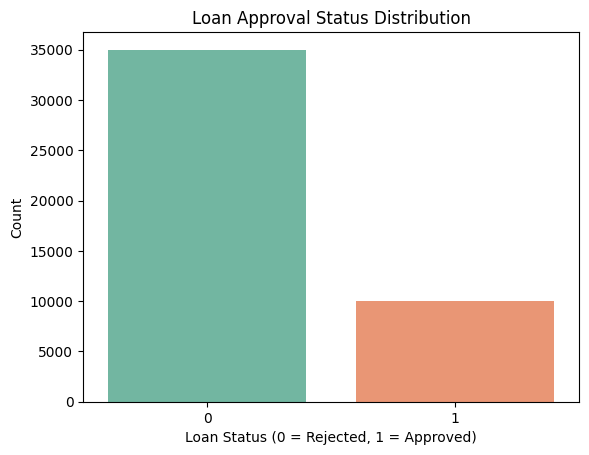

In [42]:
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title("Loan Approval Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

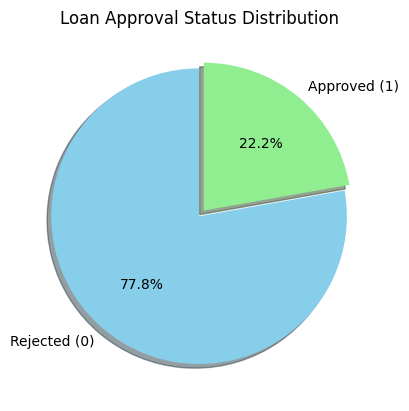

In [43]:
df['loan_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',   # show percentage with 1 decimal
    startangle=90,       # start angle for better look
    colors=['skyblue', 'lightgreen'], # custom colors
    labels=['Rejected (0)', 'Approved (1)'], # add labels
    explode=[0, 0.05],   # pop out approved for highlight
    shadow=True
)

plt.title("Loan Approval Status Distribution")
plt.ylabel("")  # remove y-axis label
plt.show()

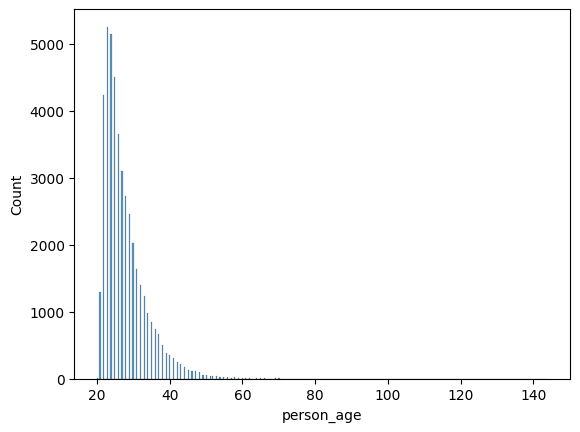

In [44]:
sns.histplot(df['person_age'])
plt.show()

In [45]:
df['person_age'].describe()

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [46]:
df[df['person_age'] > 50]

person_age person_gender person_education  person_income  \
81          144.0          male         Bachelor       300616.0   
183         144.0          male        Associate       241424.0   
575         123.0        female      High School        97140.0   
747         123.0          male         Bachelor        94723.0   
32297       144.0        female        Associate      7200766.0   
...           ...           ...              ...            ...   
43838        61.0          male        Associate        73448.0   
43921        51.0        female        Associate        19036.0   
44220        60.0          male         Bachelor        55787.0   
44702        55.0        female        Associate        68221.0   
44705        52.0        female         Bachelor        59758.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
81                125                  RENT     4800.0            VENTURE   
183               121              MORTGAGE     6000.0          EDUCATION   
575               101                  RENT    20400.0          EDUCATION   
747               100                  RENT    20000.0            VENTURE   
32297             124              MORTGAGE     5000.0           PERSONAL   
...               ...                   ...        ...                ...   
43838              35                  RENT    26550.0          EDUCATION   
43921              30                  RENT     1204.0          EDUCATION   
44220              37                  RENT    20000.0  DEBTCONSOLIDATION   
44702              31              MORTGAGE    10000.0    HOMEIMPROVEMENT   
44705              26                  RENT     7399.0            MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
81             13.57                 0.02                         3.0   
183            11.86                 0.02                         2.0   
575            10.25                 0.21                         3.0   
747            11.01                 0.21                         4.0   
32297          12.73                 0.00                        25.0   
...              ...                  ...                         ...   
43838          10.76                 0.36                        26.0   
43921          11.01                 0.06                        20.0   
44220          10.00                 0.36                        22.0   
44702          15.76                 0.15                        15.0   
44705          13.04                 0.12                        20.0   

       credit_score previous_loan_defaults_on_file  loan_status  
81              789                             No            0  
183             807                             No            0  
575             805                            Yes            0  
747             714                            Yes            0  
32297           850                             No            0  
...             ...                            ...          ...  
43838           733                             No            1  
43921           624                             No            1  
44220           710                             No            1  
44702           665                             No            1  
44705           751                             No            1  

[328 rows x 14 columns]

In [47]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

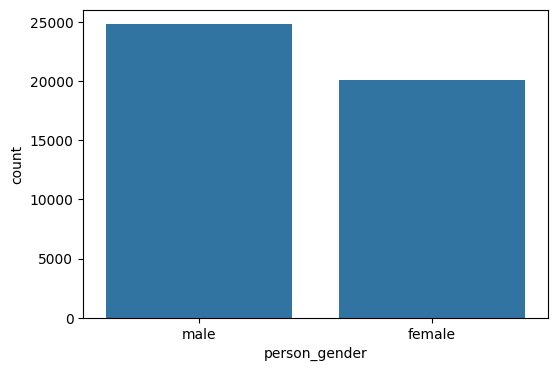

In [48]:
plt.figure(figsize = (6,4))
sns.barplot(df['person_gender'].value_counts())
plt.show()

In [49]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

<Axes: xlabel='person_education', ylabel='count'>

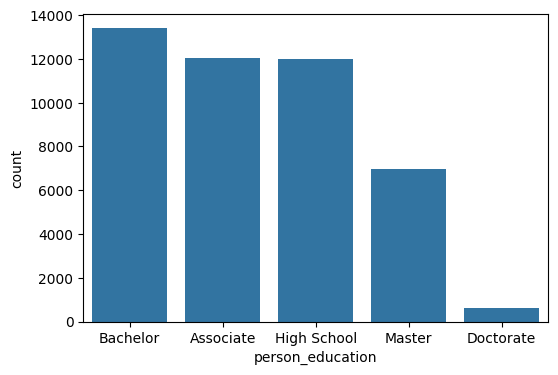

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(df['person_education'].value_counts())

In [51]:
df = df[df['person_income'] < 500000]

<Axes: xlabel='person_income', ylabel='Count'>

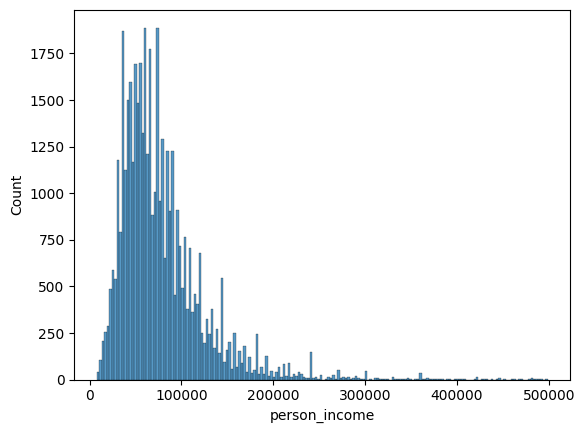

In [52]:
sns.histplot(df['person_income'])

<Axes: ylabel='person_income'>

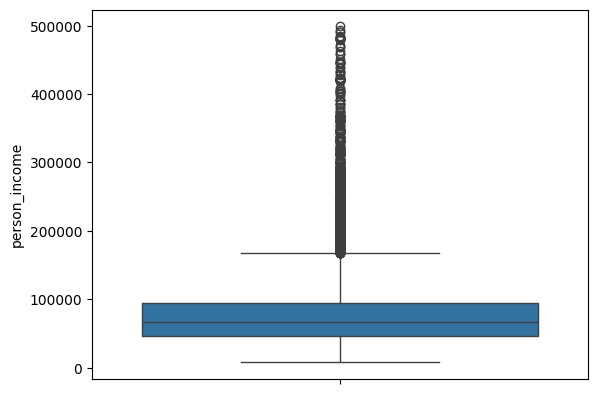

In [53]:
sns.boxplot(df['person_income'])

In [54]:
df=df[df['person_income'] < 1000000]

In [55]:
person_emp_cnt = df['person_emp_exp'].value_counts()

In [56]:
person_emp_cnt[person_emp_cnt < 20]

person_emp_exp
35     17
33     14
44     12
37     11
36      9
38      9
39      8
43      8
41      8
40      7
45      7
47      5
42      4
48      2
50      2
46      2
49      2
76      1
62      1
61      1
100     1
57      1
101     1
125     1
121     1
58      1
Name: count, dtype: int64

In [57]:
df['person_emp_exp'].describe()

count    44896.000000
mean         5.382818
std          5.988078
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64

In [58]:
df.shape

(44896, 14)

In [59]:
df = df[df['person_emp_exp'] < 30]

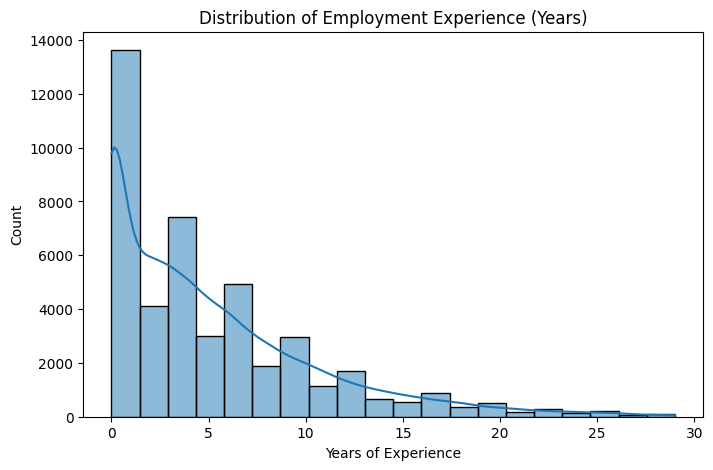

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['person_emp_exp'], bins=20, kde=True)
plt.title("Distribution of Employment Experience (Years)")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()

In [61]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23269
MORTGAGE    18331
OWN          2929
OTHER         115
Name: count, dtype: int64

<Axes: xlabel='person_home_ownership', ylabel='count'>

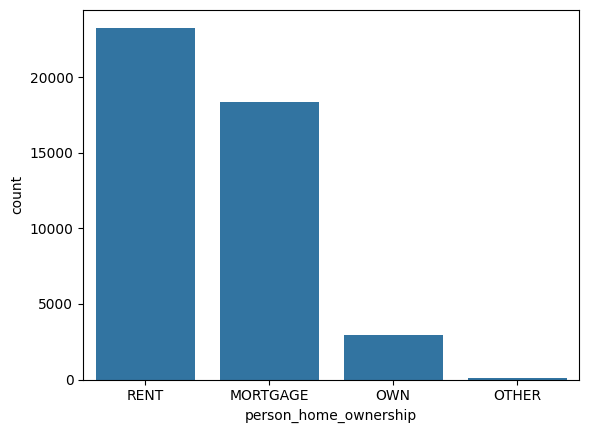

In [62]:

sns.barplot(df['person_home_ownership'].value_counts())

In [63]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23269
MORTGAGE    18331
OWN          2929
OTHER         115
Name: count, dtype: int64

In [64]:
df = df[df['person_home_ownership'] != 'OTHER']

<Axes: xlabel='loan_amnt', ylabel='Count'>

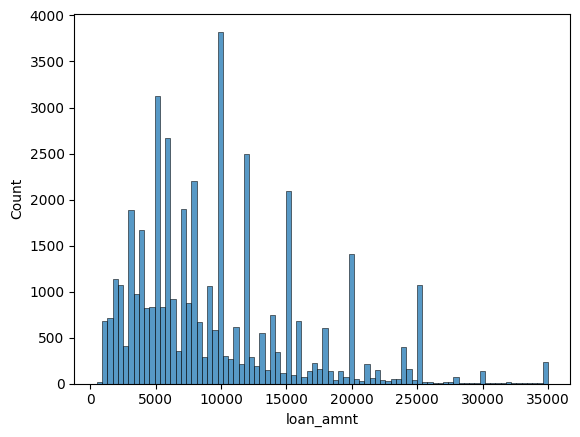

In [65]:
sns.histplot(df['loan_amnt'])

In [66]:
df['loan_amnt'].describe()

count    44529.000000
mean      9565.832446
std       6300.163481
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12164.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [67]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9102
MEDICAL              8459
VENTURE              7753
PERSONAL             7398
DEBTCONSOLIDATION    7071
HOMEIMPROVEMENT      4746
Name: count, dtype: int64

<Axes: xlabel='loan_intent', ylabel='count'>

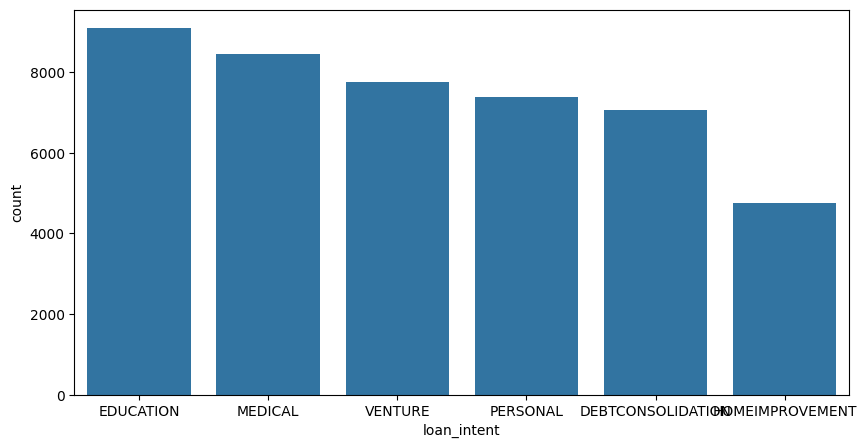

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(df['loan_intent'].value_counts())

In [69]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [70]:
df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
44995    15.66
44996    14.07
44997    10.02
44998    13.23
44999    17.05
Name: loan_int_rate, Length: 44529, dtype: float64

In [71]:
df['loan_int_rate'].describe()

count    44529.000000
mean        11.004344
std          2.980175
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64

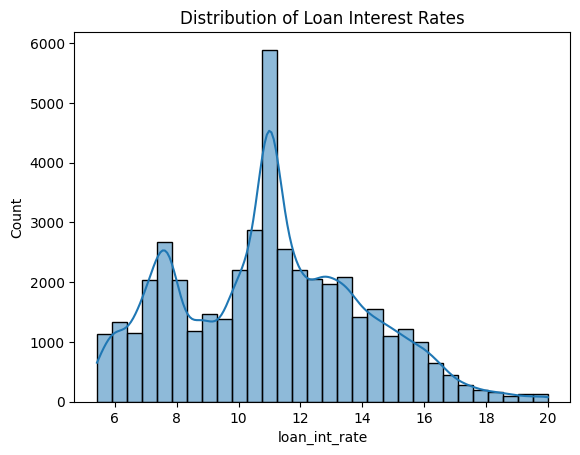

In [72]:
sns.histplot(df['loan_int_rate'], bins=30, kde=True)
plt.title("Distribution of Loan Interest Rates")
plt.show()

In [73]:
df['loan_percent_income'].describe()

count    44529.000000
mean         0.139959
std          0.087077
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64

<Axes: xlabel='loan_percent_income', ylabel='Count'>

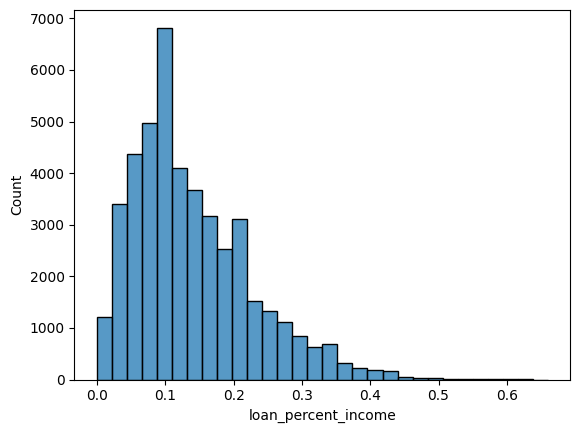

In [74]:
sns.histplot(df['loan_percent_income'],bins = 30)

In [75]:
df['cb_person_cred_hist_length'].describe()

count    44529.000000
mean         5.757686
std          3.633575
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

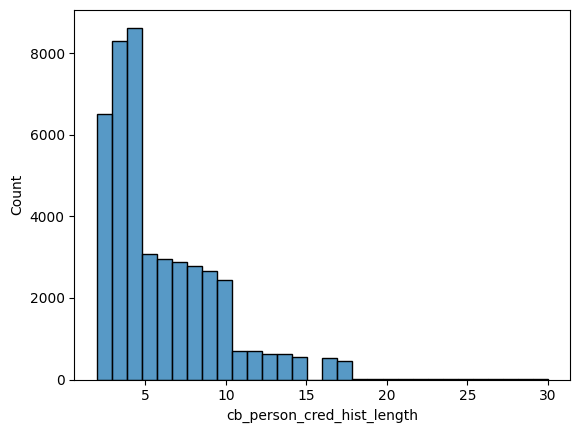

In [76]:
sns.histplot(df['cb_person_cred_hist_length'],bins = 30)


In [77]:
df = df[df['cb_person_cred_hist_length'] < 18]

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

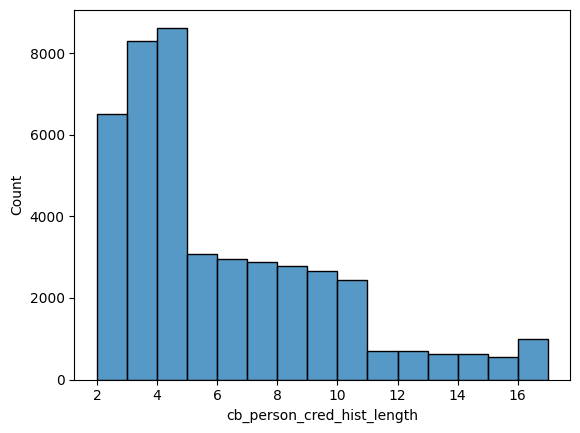

In [86]:
sns.histplot(df['cb_person_cred_hist_length'],bins = 15)

In [78]:
df['credit_score'].describe()

count    44424.000000
mean       632.230979
std         50.255910
min        390.000000
25%        601.000000
50%        639.000000
75%        669.000000
max        768.000000
Name: credit_score, dtype: float64

<Axes: xlabel='credit_score', ylabel='Count'>

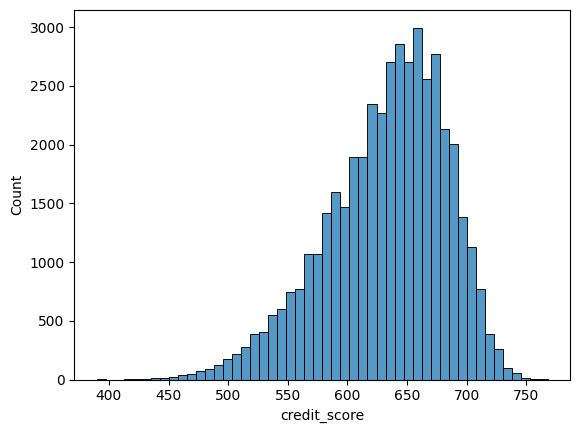

In [79]:
sns.histplot(df['credit_score'],bins = 50)

In [80]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22618
No     21806
Name: count, dtype: int64

In [81]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### Bivariant Analysis

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


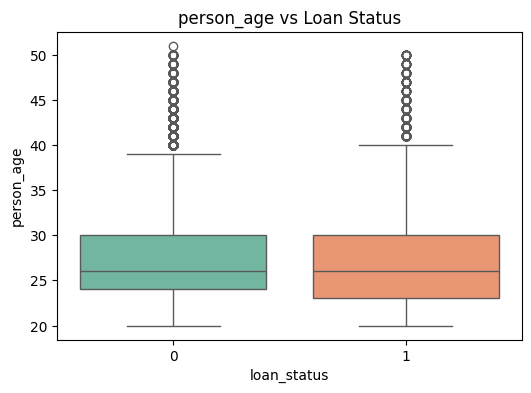

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


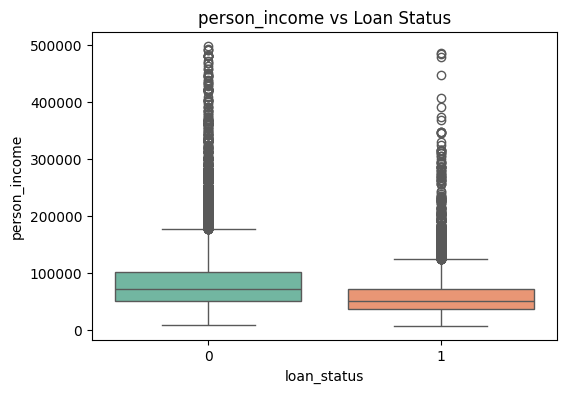

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


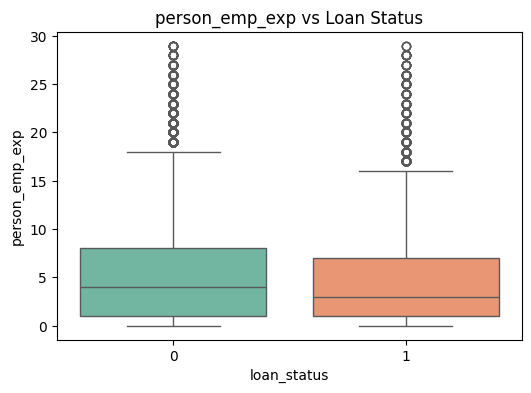

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


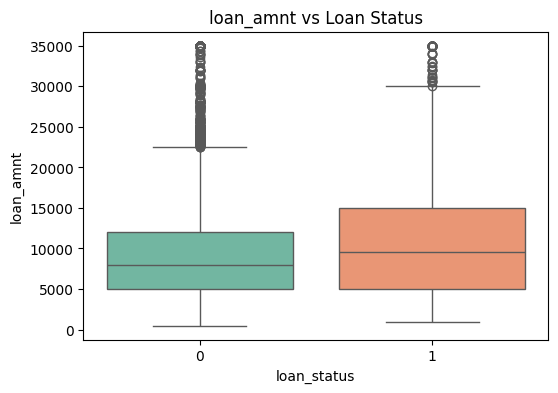

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


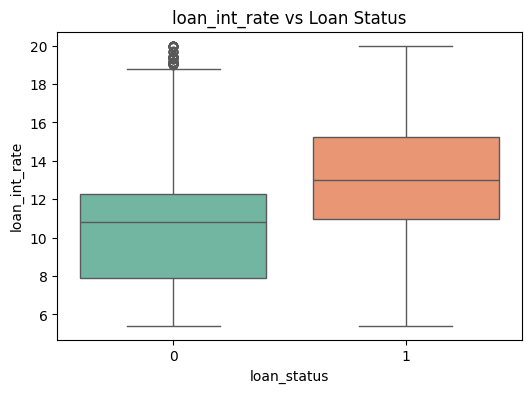

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


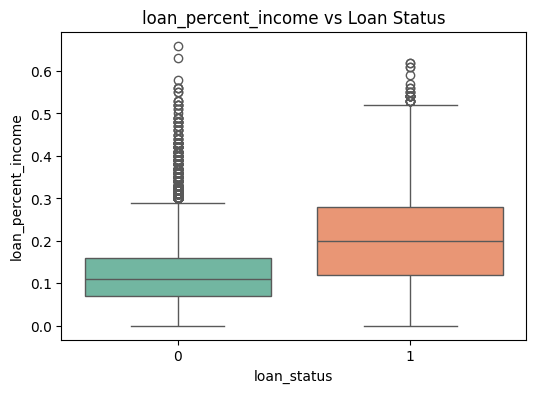

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


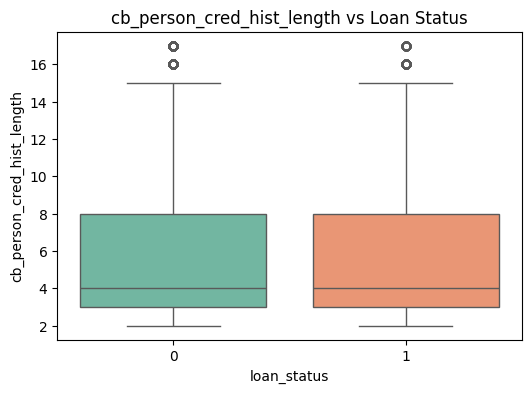

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_976\951290083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')


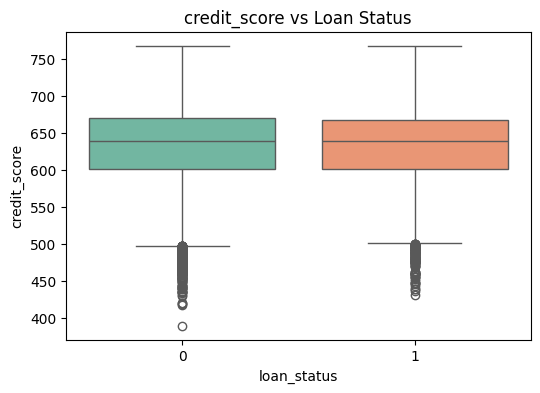

In [82]:
num_features = ['person_age','person_income','person_emp_exp',
                'loan_amnt','loan_int_rate','loan_percent_income',
                'cb_person_cred_hist_length','credit_score']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Loan Status")
    plt.show()

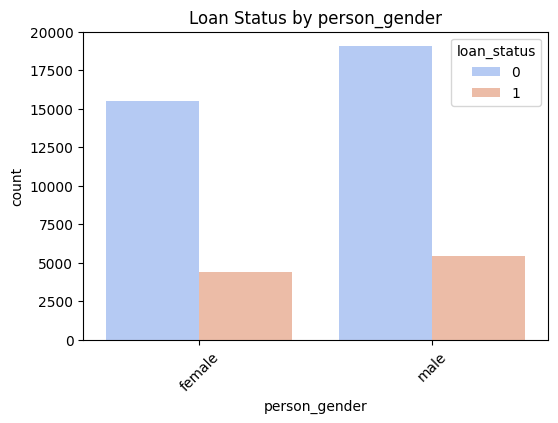

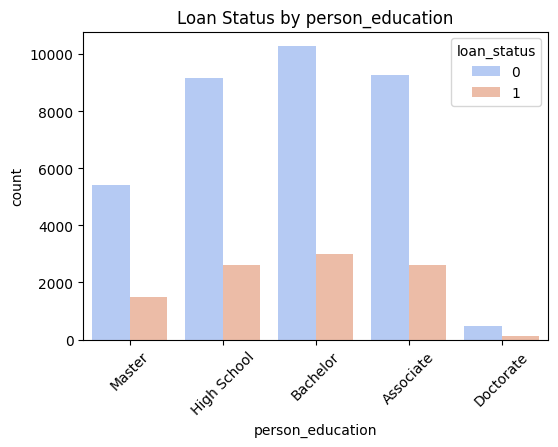

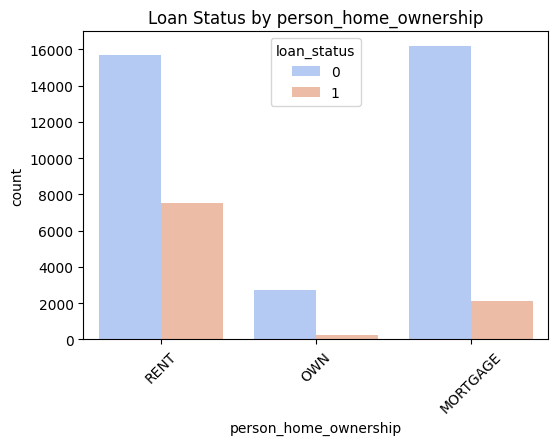

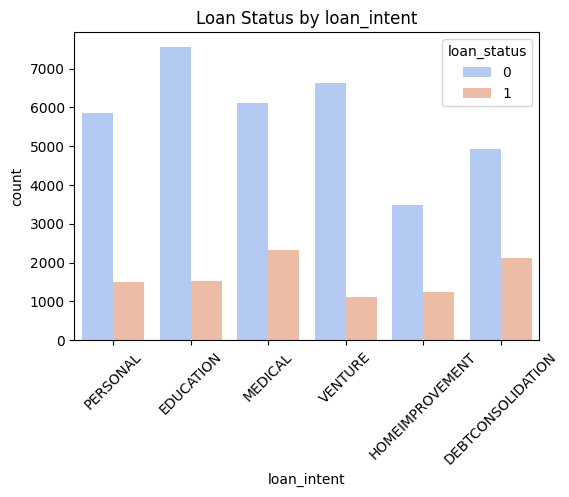

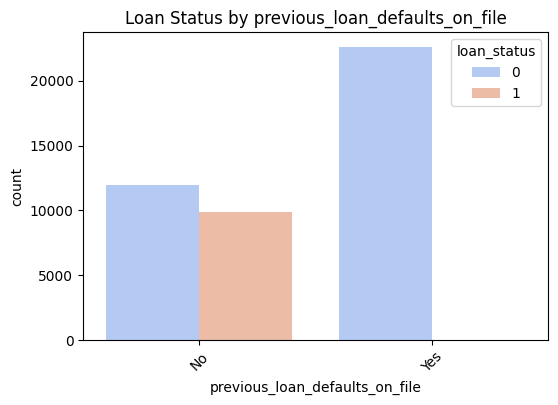

In [83]:
cat_features = ['person_gender','person_education','person_home_ownership',
                'loan_intent','previous_loan_defaults_on_file']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='loan_status', data=df, palette='coolwarm')
    plt.title(f"Loan Status by {col}")
    plt.xticks(rotation=45)
    plt.show()


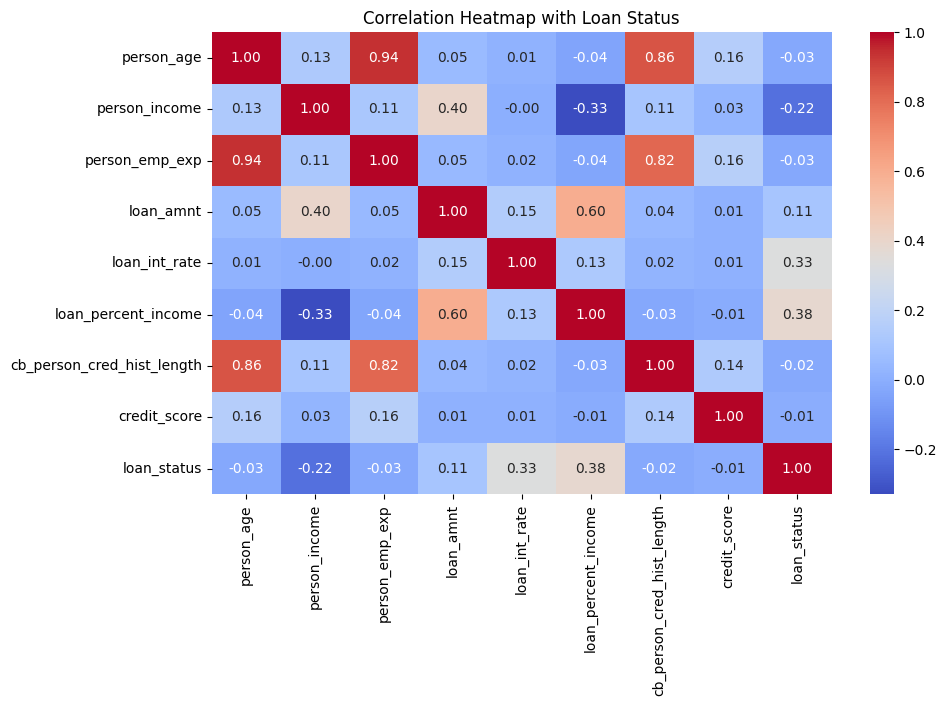

In [107]:
numerical_cols = [var for var in df.columns if df[var].dtypes != 'object']
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Loan Status")
plt.show()


In [108]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

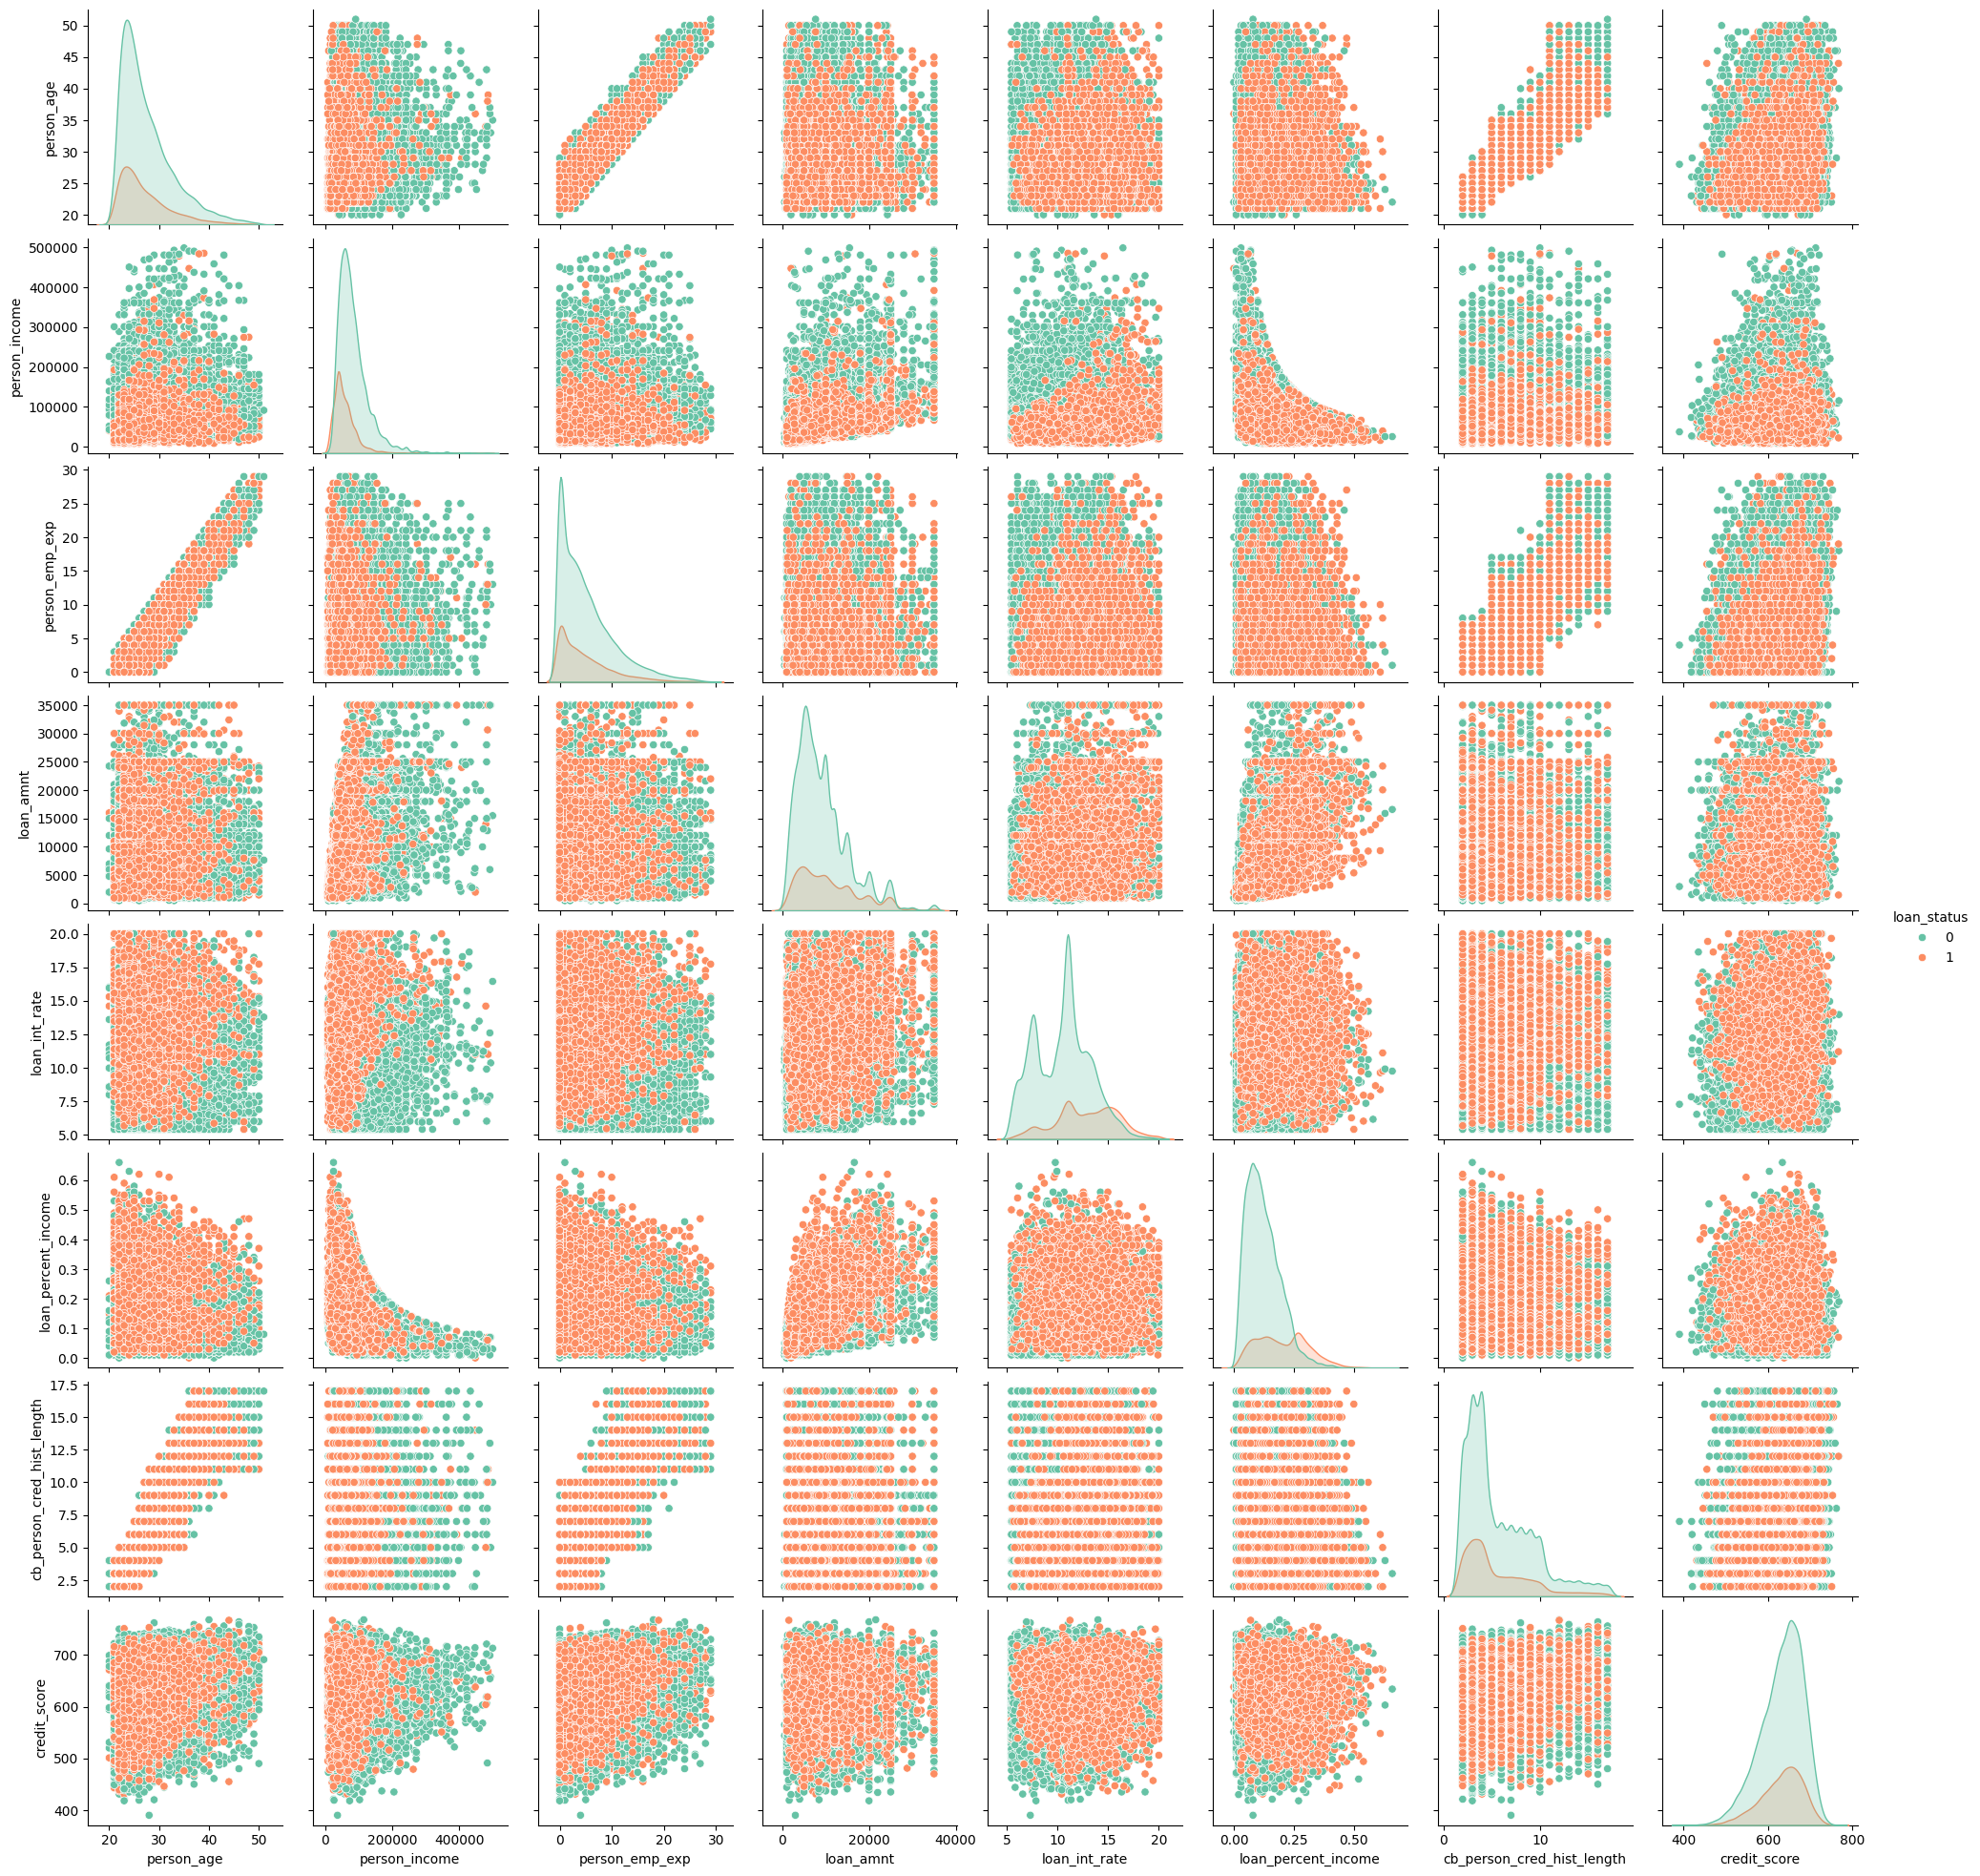

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['person_age','person_income','person_emp_exp',
                'loan_amnt','loan_int_rate','loan_percent_income',
                'cb_person_cred_hist_length','credit_score']

sns.pairplot(df[num_features + ['loan_status']], hue="loan_status", diag_kind="kde", palette="Set2")
plt.show()


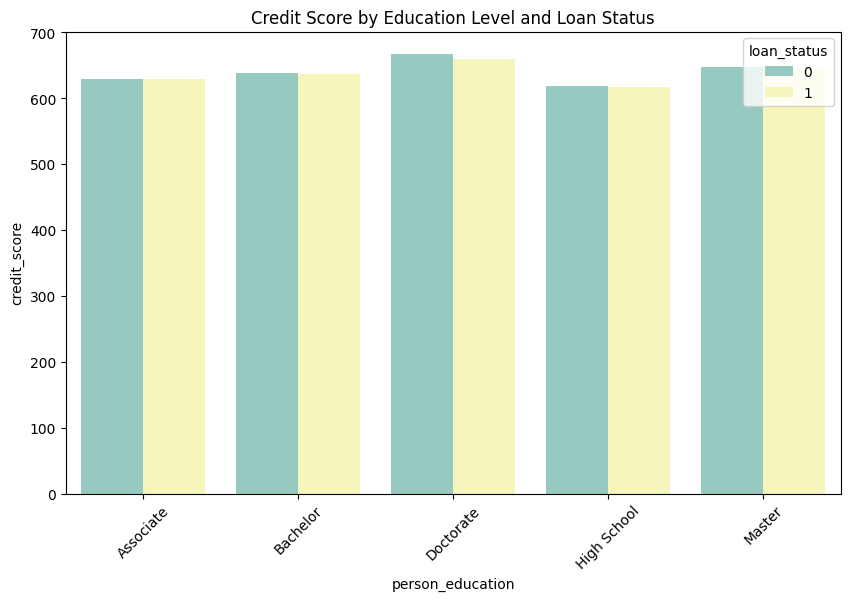

In [111]:
grouped = df.groupby(['person_education','loan_status'])[['person_income','credit_score','loan_amnt']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="person_education", y="credit_score", hue="loan_status", data=grouped, palette="Set3")
plt.title("Credit Score by Education Level and Loan Status")
plt.xticks(rotation=45)
plt.show()

D:\AI_ML_Projects\diabetes_prediction\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


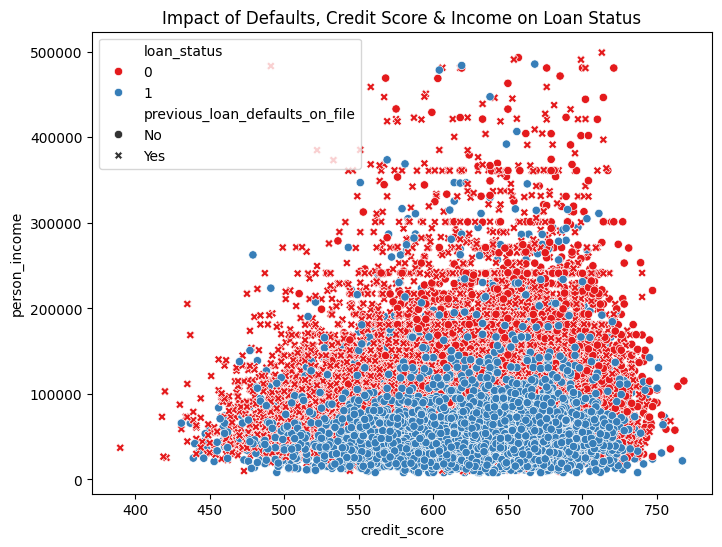

In [112]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="credit_score", y="person_income", hue="loan_status", style="previous_loan_defaults_on_file", data=df, palette="Set1")
plt.title("Impact of Defaults, Credit Score & Income on Loan Status")
plt.show()

In [113]:
df.to_csv("Cleaned_data.csv")

### Data Preparation

In [84]:
from sklearn.preprocessing import LabelEncoder
import joblib

cat_features = ['person_gender','person_education','person_home_ownership',
                'loan_intent','previous_loan_defaults_on_file']

encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # store per-column encoder

# save all encoders
joblib.dump(encoders, "encoders.joblib")


['encoders.joblib']

In [85]:

num_features = ['person_age','person_income','person_emp_exp',
                'loan_amnt','loan_int_rate','credit_score']

scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [86]:
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0    0.064516              0                 4       0.130265        0.000000   
1    0.032258              0                 3       0.008723        0.000000   
2    0.161290              0                 3       0.009040        0.103448   
3    0.096774              0                 1       0.146164        0.000000   
4    0.129032              1                 4       0.118424        0.034483   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      2   1.000000            4       0.727023   
1                      1   0.014493            1       0.392318   
2                      0   0.144928            3       0.510974   
3                      2   1.000000            3       0.672840   
4                      2   1.000000            3       0.606996   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0      0.452381   
1                 0.08                         2.0      0.301587   
2                 0.44                         3.0      0.648148   
3                 0.44                         2.0      0.753968   
4                 0.53                         4.0      0.518519   

   previous_loan_defaults_on_file  loan_status  
0                               0            1  
1                               1            0  
2                               0            1  
3                               0            1  
4                               0            1

In [87]:
X = df.drop(columns = ['loan_status'])
y = df['loan_status']

In [88]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Building

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8895891952729319
[[6493  422]
 [ 559 1411]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6915
           1       0.77      0.72      0.74      1970

    accuracy                           0.89      8885
   macro avg       0.85      0.83      0.84      8885
weighted avg       0.89      0.89      0.89      8885



In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9256049521665729
[[6729  186]
 [ 475 1495]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6915
           1       0.89      0.76      0.82      1970

    accuracy                           0.93      8885
   macro avg       0.91      0.87      0.89      8885
weighted avg       0.92      0.93      0.92      8885



In [96]:
X_train = X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent',
 'previous_loan_defaults_on_file', 'person_age', 'person_income', 'person_emp_exp',
 'loan_amnt', 'loan_int_rate', 'credit_score', 'cb_person_cred_hist_length',
 'loan_percent_income']]

X_test = X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent',
 'previous_loan_defaults_on_file', 'person_age', 'person_income', 'person_emp_exp',
 'loan_amnt', 'loan_int_rate', 'credit_score', 'cb_person_cred_hist_length',
 'loan_percent_income']]

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


D:\AI_ML_Projects\diabetes_prediction\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9316826111423748
[[6706  209]
 [ 398 1572]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6915
           1       0.88      0.80      0.84      1970

    accuracy                           0.93      8885
   macro avg       0.91      0.88      0.90      8885
weighted avg       0.93      0.93      0.93      8885



In [125]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

print(models)


{'Logistic Regression': 0.8895891952729319, 'Random Forest': 0.9256049521665729, 'XGBoost': 0.9316826111423748}


In [126]:
xgb.score(X_train,y_train)

0.9700047834773067

### Hyperparameter Tunning

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# parameter ranges
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [ 5, 6, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}


In [130]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,       # number of random combinations
    scoring='accuracy',
    cv=5,            # 5-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


D:\AI_ML_Projects\diabetes_prediction\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1.0}
Best CV Score: 0.9335941349604276


In [134]:
best_xgb = random_search.best_estimator_

y_pred_best = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Training",best_xgb.score(X_train,y_train))
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Training 0.9664031064464391
Tuned XGBoost Accuracy: 0.9337084974676421
XGBoost Accuracy: 0.9337084974676421
[[6735  180]
 [ 409 1561]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6915
           1       0.90      0.79      0.84      1970

    accuracy                           0.93      8885
   macro avg       0.92      0.88      0.90      8885
weighted avg       0.93      0.93      0.93      8885



In [98]:
import joblib
joblib.dump(xgb, 'model.joblib')
joblib.dump(le,'le.joblib')
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

In [99]:
X_train.columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file', 'person_age',
       'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
       'credit_score', 'cb_person_cred_hist_length', 'loan_percent_income'],
      dtype='object')